<h1 align = "center">机器学习第二次实验报告</h1>

<h5 align = "center">姓名：邢清画&nbsp&nbsp&nbsp&nbsp         学号：2211999  &nbsp &nbsp&nbsp专业：物联网工程</h5>

### 实验题目

- 回归模型

### 实验要求

#### 1.基本要求：
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理
#### 2.中级要求：
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。
#### 3.高级要求：
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

### 代码实现

#### 1. **基本要求**

对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率，代码如下：

##### **1.1 关键内容：**

**1. 数据读取与预处理（标准化）**：

在此部分，调用数据读取、标准化和数据集划分的函数，得到预处理后的训练集和测试集：

数据集为 CSV 格式，跳过第一行标题，提取最后一列作为标签，其余列作为特征。

为了确保特征数据处于相似的范围内，避免模型对不同量纲的数据产生偏向，我们选择**标准化**进行预处理。这是因为梯度下降等优化算法对数据尺度敏感，标准化可以加快模型收敛。

使用随机抽样方法，确保每个标签类别的样本在训练集和测试集中的比例一致。设置test_rate 为 0.2

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 负号显示

# 数据读取
path = "winequality-white.csv"
def read_data(path):
    # 从CSV文件中读取数据
    data = np.loadtxt(path, delimiter=",", skiprows=1)
    label = data[:, -1]  # 标签是数据集的最后一列
    data = data[:, :-1]  # 特征是除最后一列外的其他列
    return np.array(data), np.array(label)
# 数据标准化
def standardize(data):
    # 标准化处理数据：均值为0，标准差为1
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# 数据划分
def split_data(data, label, test_rate):
    train_index = []
    test_index = []
    label_ids = {}

    # 统计每个标签对应的样本索引
    for i in range(len(label)):
        label_val = label[i]
        if label_val not in label_ids:
            label_ids[label_val] = []
        label_ids[label_val].append(i)

    # 随机抽取测试样本
    for key, value in label_ids.items():
        sample_num = int(test_rate * len(value))
        sample_list = random.sample(value, sample_num)
        test_index.extend(sample_list)

    train_index = list(set(range(len(label))) - set(test_index))

    # 打乱索引以保证随机性
    random.shuffle(train_index)
    random.shuffle(test_index)

    train_data = [data[i] for i in train_index]
    train_label = [label[i] for i in train_index]
    test_data = [data[i] for i in test_index]
    test_label = [label[i] for i in test_index]

    return np.array(train_data), np.array(train_label), np.array(test_data), np.array(test_label)
# 数据处理
def data_process(path):
    data, label = read_data(path)  # 读取数据
    data = standardize(data)  # 标准化数据
    # 加入偏置项，所有数据的第一列都为1，用于线性回归的偏置项
    data = np.hstack((np.ones((data.shape[0], 1)), data))
    train_data, train_label, test_data, test_label = split_data(data, label, 0.2)
    return train_data, train_label, test_data, test_label

**2. 均方误差（MSE）计算**：

均方误差用于评估模型的预测准确性，它衡量的是预测值和真实值之间的误差平方的平均值，MSE 越小，模型预测越准确。均方误差（MSE）的计算公式为：

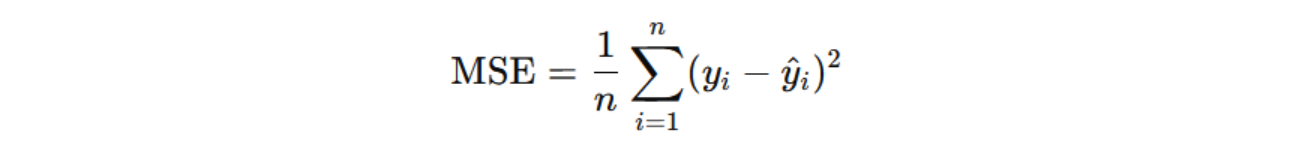

In [20]:
def MSE(weight, x, y):
    difference = y - np.dot(x, weight)
    error = np.array([num * num for num in difference])
    mse = error.mean()
    return mse

**3. 梯度下降算法**：

随机梯度下降（SGD）：逐个样本进行梯度更新，适合处理大规模数据。

批量梯度下降（BGD）：一次性使用整个数据集计算梯度更新，适合小规模数据。

**随机梯度下降**代码：

In [21]:
def Stochastic_gradient(weight, x, y):
    difference = y - np.dot(x, weight)
    delta = np.dot(np.transpose(difference), x)
    return delta

# 随机梯度下降
def Stochastic_gradient_descent(data, label, learning_rate, epochs=100, epsilon=1e-7):
    weight = np.random.rand(data.shape[1])
    mses = [MSE(weight, data, label)]

    for epoch in range(epochs):
        for i in range(data.shape[0]):
            x = data[i, :]
            y = label[i]
            delta = Stochastic_gradient(weight, x, y)
            weight = weight + learning_rate * delta
            mse = MSE(weight, data, label)
            mses.append(mse)
            # print(f"Epoch {epoch + 1}/{epochs}, SGD Train MSE: {mse:.4f}")
            if abs(mses[-2] - mses[-1]) < epsilon:
                return mses, weight
    print(f"最终收敛的 SGD Train MSE: {mse:.4f}, learning rate: {learning_rate}")
    return mses, weight

**批量梯度下降**代码：

In [22]:
def batch_gradient(weight, x, y):
    difference = y - np.dot(x, weight)
    delta = np.dot(np.transpose(difference), x) / x.shape[0]  # 求平均梯度
    return delta

# 批量梯度下降
def batch_gradient_descent(data, label, learning_rate, epochs=3000, epsilon=1e-7):
    weight = np.random.rand(data.shape[1])
    mses = [MSE(weight, data, label)]

    for epoch in range(epochs):
        delta = batch_gradient(weight, data, label)
        weight = weight + learning_rate * delta
        mse = MSE(weight, data, label)
        mses.append(mse)
        # print(f"Epoch {epoch + 1}/{epochs}, BGD Train MSE: {mse:.4f}")
        if abs(mses[-2] - mses[-1]) < epsilon:
            break
    print(f"最终收敛的 BGD Train MSE: {mse:.4f}, learning rate: {learning_rate}")
    return mses, weight

收敛条件：if abs(mses[-2] - mses[-1]) < epsilon 用来判断当前的均方误差 (MSE) 与上一轮训练的 MSE 差值是否足够小。

当差值小于设定的阈值 epsilon（通常为一个非常小的值，例如 1e-7），模型会认为已收敛，不再需要继续训练，因此提前停止。

**4. 梯度下降的线性回归**：

用于训练批量梯度下降和随机梯度下降模型，返回训练和测试集的 MSE：

In [24]:
# 批量梯度下降的线性回归
def regression_BGD(path, learning_rate):
    train_data, train_label, test_data, test_label = data_process(path)
    mses, weight = batch_gradient_descent(train_data, train_label, learning_rate)
    mse_test = MSE(weight, test_data, test_label)
    mse_train = MSE(weight, train_data, train_label)
    # print(f"测试集上的最终 BGD MSE: {mse_test:.4f}")
    return mse_test, mse_train, mses

# 随机梯度下降的线性回归
def regression_SGD(path, learning_rate):
    train_data, train_label, test_data, test_label = data_process(path)
    mses, weight = Stochastic_gradient_descent(train_data, train_label, learning_rate)
    mse_test = MSE(weight, test_data, test_label)
    mse_train = MSE(weight, train_data, train_label)
    # print(f"测试集上的最终 SGD MSE: {mse_test:.4f}")
    return mse_test, mse_train, mses

**5. 模型训练与结果展示**：

分别使用随机梯度下降和批量梯度下降对模型进行训练，并展示训练过程中 MSE 的变化曲线。

In [25]:
# 展示批量梯度下降的训练结果
def show_BGD(path, learning_rate):
    mse_test_BGD, mse_train_BGD, mses_BGD = regression_BGD(path, learning_rate)
    print('learning rate :', learning_rate)
    print('测试集上mse :', mse_test_BGD)
    print('训练集上mse:', mse_train_BGD)

    plt.figure()
    k = [x for x in range(len(mses_BGD))]
    plt.plot(k, mses_BGD, color='red')
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error(MSE)')
    plt.title("批量梯度下降(BGD)epoch-mse")
    plt.show()

# 展示随机梯度下降的训练结果
def show_SGD(path, learning_rate):
    mse_test_SGD, mse_train_SGD, mses_SGD = regression_SGD(path, learning_rate)
    print('learning rate :', learning_rate)
    print('测试集mse :', mse_test_SGD)
    print('训练集上mse:', mse_train_SGD)

    plt.figure()
    k = [x for x in range(len(mses_SGD))]
    plt.plot(k, mses_SGD, color='blue')
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error(MSE)')
    plt.title("随机梯度下降(SGD)epoch-mse")
    plt.show()

在此处可以对不同的learning rate进行测试，来选择最佳的学习率。

最终收敛的 BGD Train MSE: 2.3611, 学习率: 0.0005
学习率 : 0.0005
测试集上均方误差 : 2.3123834677659296
训练集上均方误差: 2.361084696490642


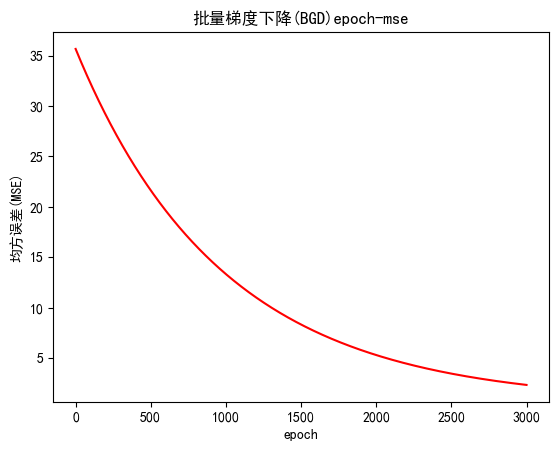

学习率 : 0.0005
测试集上均方误差 : 0.6420016770490673
训练集上均方误差: 0.6708970928847241


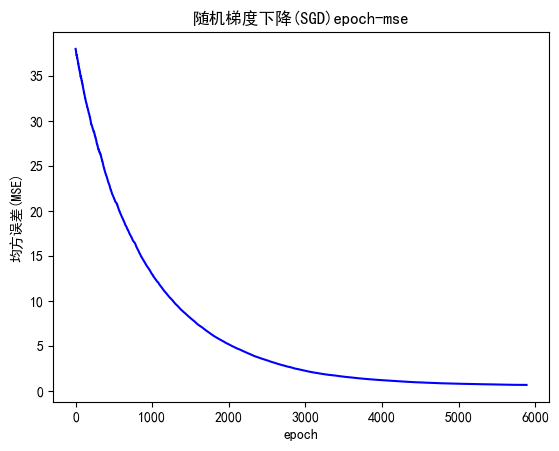

最终收敛的 BGD Train MSE: 0.6825, 学习率: 0.001
学习率 : 0.001
测试集上均方误差 : 0.6276887248569465
训练集上均方误差: 0.6824985112057824


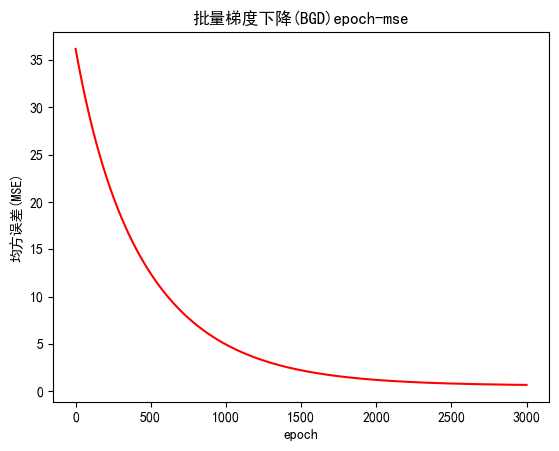

学习率 : 0.001
测试集上均方误差 : 0.6098416625112236
训练集上均方误差: 0.5813988302221954


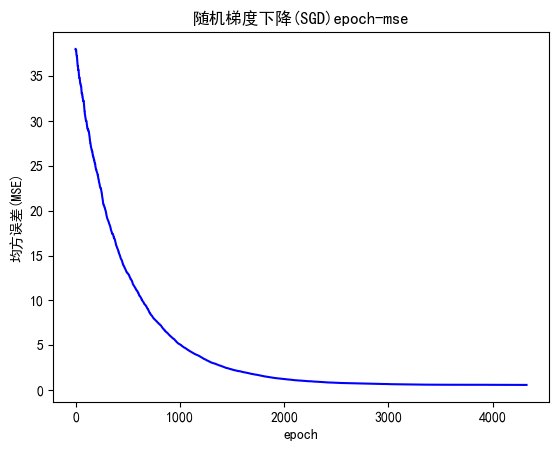

最终收敛的 BGD Train MSE: 0.5847, 学习率: 0.002
学习率 : 0.002
测试集上均方误差 : 0.559560112561184
训练集上均方误差: 0.5847024943257311


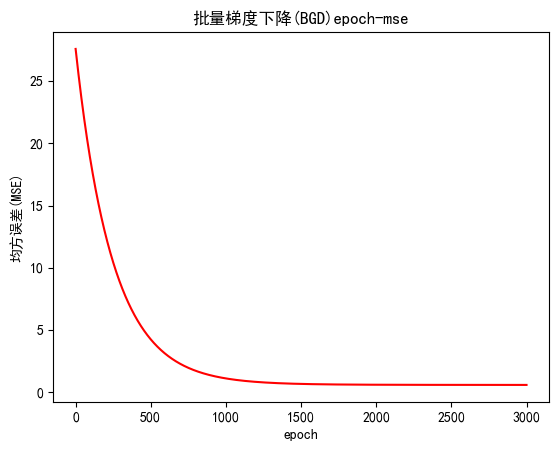

学习率 : 0.002
测试集上均方误差 : 0.6276386810095136
训练集上均方误差: 0.6031553952457175


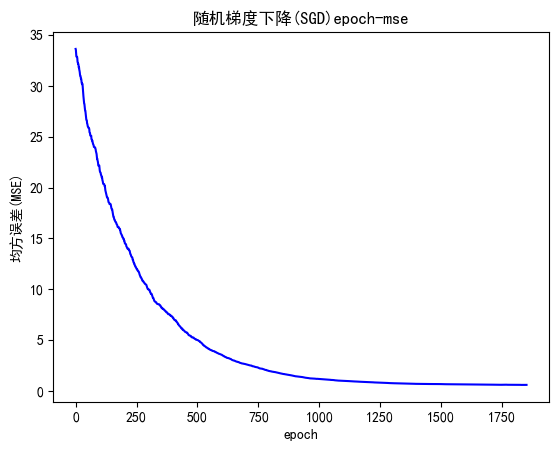

最终收敛的 BGD Train MSE: 0.5532, 学习率: 0.003
学习率 : 0.003
测试集上均方误差 : 0.613842433984829
训练集上均方误差: 0.5531779264868169


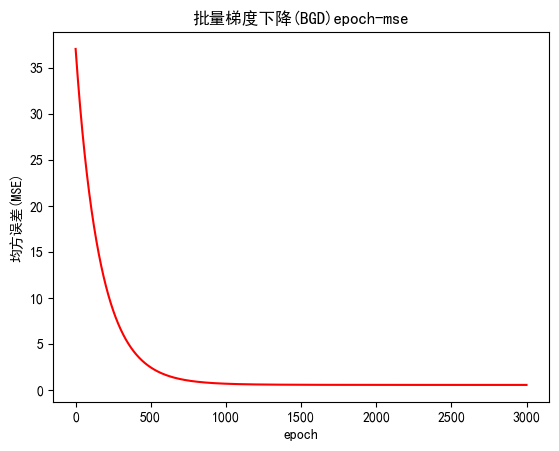

学习率 : 0.003
测试集上均方误差 : 0.5858014157626524
训练集上均方误差: 0.5860509505300152


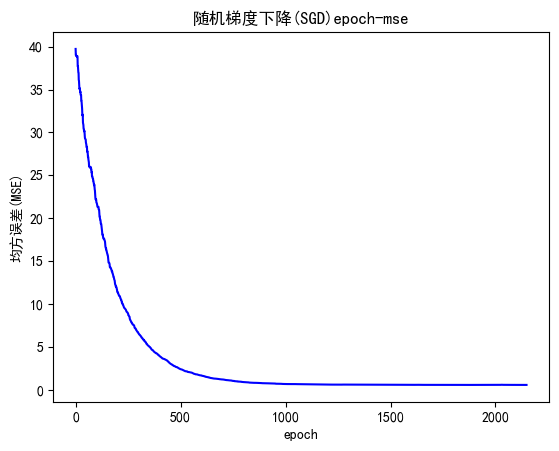

最终收敛的 BGD Train MSE: 0.5670, 学习率: 0.004
学习率 : 0.004
测试集上均方误差 : 0.5567747977443954
训练集上均方误差: 0.567034403142504


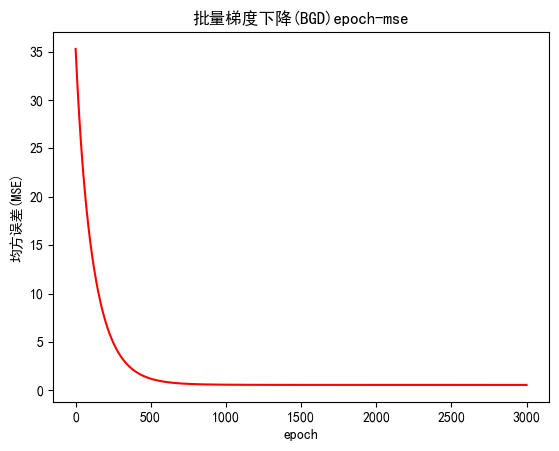

学习率 : 0.004
测试集上均方误差 : 0.6055940620269683
训练集上均方误差: 0.6213848713425496


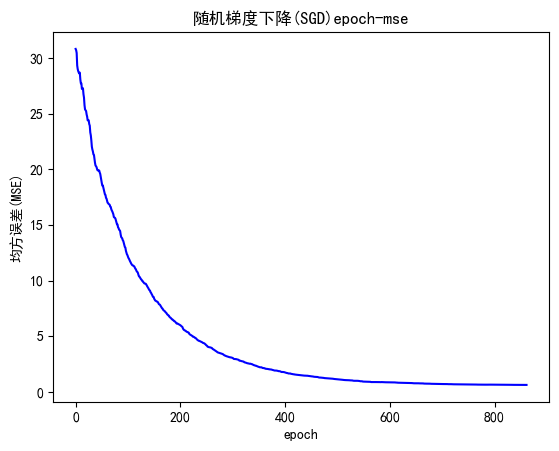

最终收敛的 BGD Train MSE: 0.5737, 学习率: 0.005
学习率 : 0.005
测试集上均方误差 : 0.5505418236478389
训练集上均方误差: 0.573693922607577


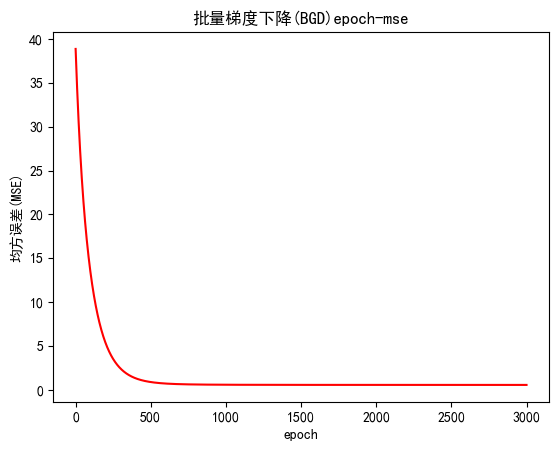

学习率 : 0.005
测试集上均方误差 : 0.6028946968364108
训练集上均方误差: 0.563902098119396


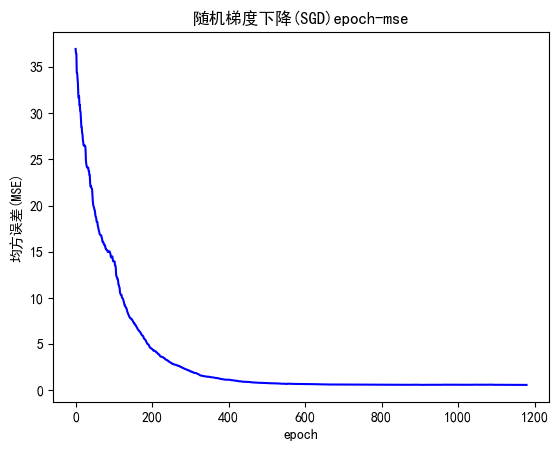

最终收敛的 BGD Train MSE: 0.5676, 学习率: 0.007
学习率 : 0.007
测试集上均方误差 : 0.553641791107541
训练集上均方误差: 0.5675880339432874


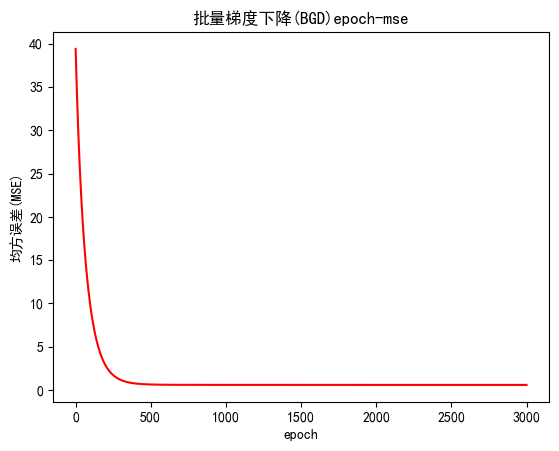

学习率 : 0.007
测试集上均方误差 : 0.5697586181204768
训练集上均方误差: 0.5939438710133175


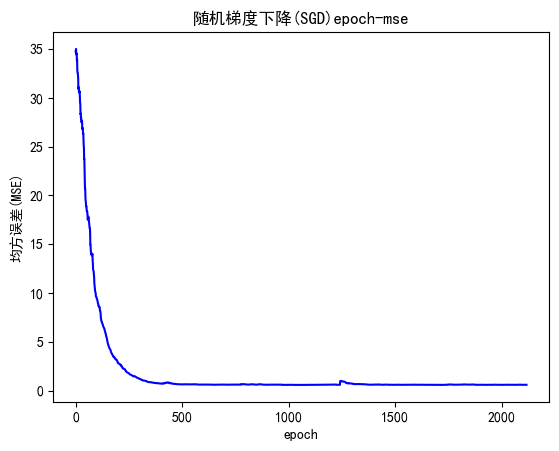

最终收敛的 BGD Train MSE: 0.5686, 学习率: 0.01
学习率 : 0.01
测试集上均方误差 : 0.5535549173339052
训练集上均方误差: 0.5686298429742148


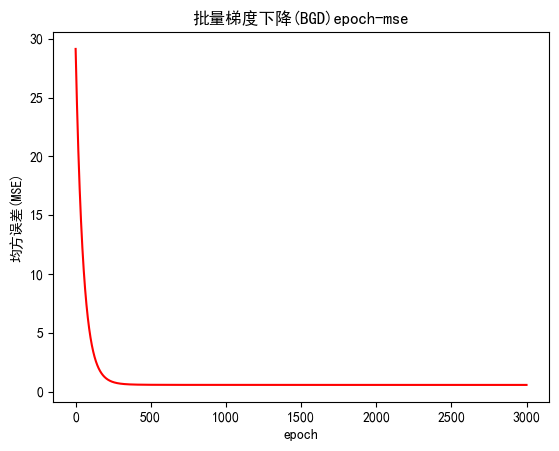

学习率 : 0.01
测试集上均方误差 : 0.5600172319331852
训练集上均方误差: 0.5713552834339766


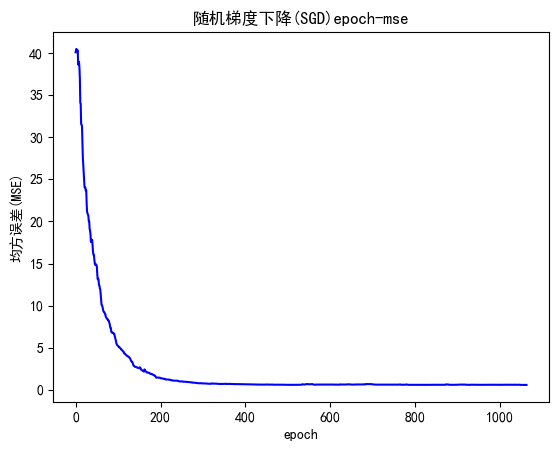

In [28]:
# 运行代码并展示结果
show_BGD(path, 0.0005)
show_SGD(path, 0.0005)

show_BGD(path, 0.001)
show_SGD(path, 0.001)

# show_BGD(path, 0.0015)
# show_SGD(path, 0.0015)

show_BGD(path, 0.002)
show_SGD(path, 0.002)

show_BGD(path, 0.003)
show_SGD(path, 0.003)

show_BGD(path, 0.004)
show_SGD(path, 0.004)

show_BGD(path, 0.005)
show_SGD(path, 0.005)

show_BGD(path, 0.007)
show_SGD(path, 0.007)

show_BGD(path, 0.01)
show_SGD(path, 0.01)

##### **1.2 结果分析：**

通过对不同学习率下均方误差 (MSE) 的收敛曲线进行观察，可以发现：

1. 学习率与收敛速度的关系

    从提供的图中可以看到，随着学习率的增大，模型的收敛速度也明显加快。在学习率较低时（例如 0.0005），模型需要较多的轮次才能达到稳定的收敛。而在学习率较高时（例如 0.01），模型能够在较少的轮次内快速收敛。这表明，较高的学习率能够加速收敛过程，但需要控制在合理范围内，以避免训练不稳定。

2. 收敛所需轮次的减少

    当学习率增大时，批量梯度下降 (BGD) 和随机梯度下降 (SGD) 的收敛所需轮次显著减少。例如，学习率为 0.0005 时，BGD 模型在 3000 轮后逐渐稳定，而 SGD 则需要超过 6000 轮次才接近稳定。而当学习率为 0.007 时，BGD 在 250 轮次左右就基本收敛，SGD 也仅需 400 轮左右即可达到稳定状态。此趋势表明，学习率较大时能够更快地使模型接近全局最优解，但学习率过高可能导致模型无法找到更优的解，从而影响泛化能力。

3. 曲线波动分析

    在收敛曲线中可以观察到，较低学习率下，MSE 曲线更加平滑，收敛过程较为平稳。然而，在较高学习率下，尤其是 SGD 模型中，曲线波动相对较大，尤其是在前几百轮次内，存在一定的抖动现象。这是因为随机梯度下降中，单个样本的梯度更新更容易受到随机性影响，导致模型参数更新的幅度不稳定。相比之下，批量梯度下降的曲线波动较小，更加平滑。

4. 学习率与最终收敛的MSE

    当学习率增大时，虽然模型的收敛速度加快，但并不一定会使最终的 MSE 显著降低。例如，从结果中可以看到，学习率为 0.001 时，BGD 和 SGD 的测试集 MSE 较小，分别为 0.627 和 0.609；当学习率为 0.003 或更高时，测试集上的 MSE 并没有进一步显著降低，反而出现略微增大的情况。这说明，学习率过高可能导致模型无法找到更优的解，从而影响泛化能力。

5. BGD 与 SGD 的对比

    总体上，批量梯度下降比随机梯度下降在收敛速度和稳定性上表现更加平滑和稳健。SGD 的波动性较大，尤其是在训练初期，更新的波动较大，但在一定轮次后趋于平稳。此外，在同一学习率下，BGD 模型的测试集 MSE 通常略高于 SGD，但差异并不明显。这可能是因为 SGD 的随机更新策略在一定程度上能够避免局部最优解。

为了更直观地观察不同学习率对批量梯度下降 (BGD) 和随机梯度下降 (SGD) 模型在训练集和测试集上表现的影响，设计了一组实验，测试了不同的学习率下模型的均方误差 (MSE) 收敛情况。在每个学习率下，我们分别记录了训练集和测试集上的 MSE，最终将这些结果整合到一张图上进行对比。

最终收敛的 BGD Train MSE: 2.1933, 学习率: 0.0005
最终收敛的 BGD Train MSE: 0.6973, 学习率: 0.001
最终收敛的 BGD Train MSE: 0.5712, 学习率: 0.002
最终收敛的 BGD Train MSE: 0.5627, 学习率: 0.003
最终收敛的 BGD Train MSE: 0.5729, 学习率: 0.004
最终收敛的 BGD Train MSE: 0.5630, 学习率: 0.005
最终收敛的 BGD Train MSE: 0.5702, 学习率: 0.007
最终收敛的 BGD Train MSE: 0.5715, 学习率: 0.01


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


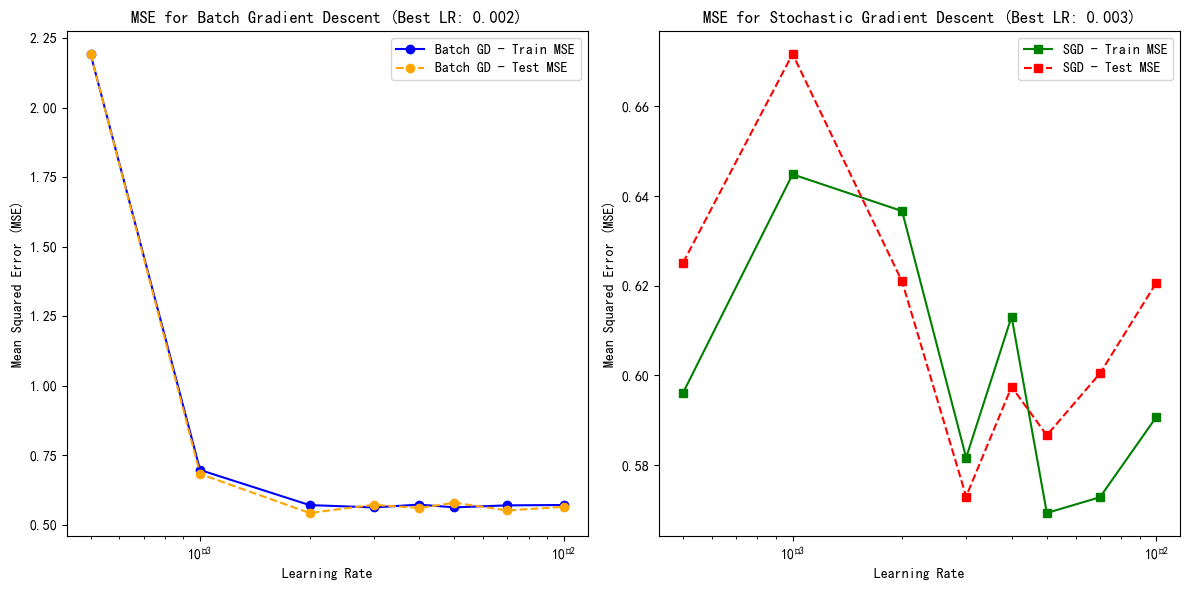

最佳学习率 (BGD): 0.002
最佳学习率 (SGD): 0.003


In [29]:
# 用于收集不同学习率的 MSE 结果，并找到最佳学习率
def collect_mse_results(path, learning_rates):
    bgd_train_mses = []
    bgd_test_mses = []
    sgd_train_mses = []
    sgd_test_mses = []

    for lr in learning_rates:
        mse_test_BGD, mse_train_BGD, _ = regression_BGD(path, lr)
        mse_test_SGD, mse_train_SGD, _ = regression_SGD(path, lr)

        bgd_train_mses.append(mse_train_BGD)
        bgd_test_mses.append(mse_test_BGD)
        sgd_train_mses.append(mse_train_SGD)
        sgd_test_mses.append(mse_test_SGD)

    # 找到测试集上 MSE 最小的学习率
    best_bgd_lr = learning_rates[np.argmin(bgd_test_mses)]
    best_sgd_lr = learning_rates[np.argmin(sgd_test_mses)]

    return bgd_train_mses, bgd_test_mses, sgd_train_mses, sgd_test_mses, best_bgd_lr, best_sgd_lr

# 绘制所有学习率的 MSE 结果
def plot_mse_results(learning_rates, bgd_train_mses, bgd_test_mses, sgd_train_mses, sgd_test_mses, best_bgd_lr, best_sgd_lr):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # 批量梯度下降图像
    ax1.plot(learning_rates, bgd_train_mses, label="Batch GD - Train MSE", color="blue", marker="o")
    ax1.plot(learning_rates, bgd_test_mses, label="Batch GD - Test MSE", color="orange", marker="o", linestyle="--")
    ax1.set_xscale('log')
    ax1.set_xlabel("Learning Rate")
    ax1.set_ylabel("Mean Squared Error (MSE)")
    ax1.set_title(f"MSE for Batch Gradient Descent (Best LR: {best_bgd_lr})")
    ax1.legend()

    # 随机梯度下降图像
    ax2.plot(learning_rates, sgd_train_mses, label="SGD - Train MSE", color="green", marker="s")
    ax2.plot(learning_rates, sgd_test_mses, label="SGD - Test MSE", color="red", marker="s", linestyle="--")
    ax2.set_xscale('log')
    ax2.set_xlabel("Learning Rate")
    ax2.set_ylabel("Mean Squared Error (MSE)")
    ax2.set_title(f"MSE for Stochastic Gradient Descent (Best LR: {best_sgd_lr})")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 定义不同的学习率进行测试
learning_rates = [0.0005, 0.001,  0.002, 0.003, 0.004, 0.005, 0.007, 0.01]

# 收集 MSE 结果
bgd_train_mses, bgd_test_mses, sgd_train_mses, sgd_test_mses, best_bgd_lr, best_sgd_lr = collect_mse_results(path, learning_rates)

# 绘制学习率对比图
plot_mse_results(learning_rates, bgd_train_mses, bgd_test_mses, sgd_train_mses, sgd_test_mses, best_bgd_lr, best_sgd_lr)

# 输出最佳学习率
print(f"最佳学习率 (BGD): {best_bgd_lr}")
print(f"最佳学习率 (SGD): {best_sgd_lr}")

通过对不同学习率下均方误差 (MSE) 与学习率的关系进行分析，可以得到以下规律和结论：

1. BGD 收敛表现

    从图中 BGD 曲线来看，当学习率从 0.0005 增加到 0.002 时，训练集和测试集的 MSE 都逐渐下降，并且在学习率为 0.002 时达到了最佳点。此时，训练集和测试集的 MSE 都趋于一致，分别为 0.5627 和 0.5729，显示模型在该学习率下有较好的泛化能力。
    
    在学习率继续增加到 0.01 时，训练集和测试集的 MSE 基本保持稳定，略有波动。这说明在该范围内，BGD 对学习率的变化表现较为稳健，但学习率过高并没有显著带来更好的效果。

2. SGD 收敛表现

    相比于 BGD，SGD 的表现更为复杂和波动。从图中可以看到，当学习率从 0.0005 增加到 0.003 时，测试集的 MSE 一直呈现下降趋势，且在学习率 0.003 时达到了最低值。测试集的 MSE 最终为 0.5858，显示出较好的收敛效果。
    然而，SGD 曲线波动较大，尤其是在学习率较高时（例如 0.005 及以上），MSE 的波动幅度增大。这种波动性可能是由于 SGD 在每次更新中仅使用单个样本的梯度进行参数调整，导致收敛过程不如 BGD 稳定。

    尽管波动较大，但在 0.003 的学习率下，SGD 能够获得较好的收敛效果，并且其泛化能力在该点表现良好。

3. BGD 和 SGD 的对比

    总体来看，BGD 的曲线较为平滑，收敛过程稳定，对学习率的变化较为稳健。在较低的学习率下，BGD 逐渐收敛并维持较低的 MSE。

    相比之下，SGD 曲线的波动性更大，尤其是在高学习率下表现出较大的不稳定性，但其在学习率为 0.003 时能够取得较好的测试集表现。由于 SGD 是通过逐个样本更新参数，虽然速度较快，但也更加容易受到数据的噪声或异常值的影响。

4. 最佳学习率

    通过对比训练集和测试集的 MSE，我们可以得出 BGD 的最佳学习率为 0.002，在该点下模型表现稳定且泛化良好。
    对于 SGD，最佳学习率为 0.003，此时的测试集 MSE 达到最优，尽管训练过程波动较大，但在该学习率下模型的泛化能力最强。



#### **2.中级要求**

回归模型是机器学习和统计学中常用的工具，然而尽管它们在两者中有相似的使用方法，但它们的目标、假设以及应用场景却有根本性的差异。

##### **2.1 在机器学习中的应用：**

**目标**：在机器学习中，回归模型的主要目标是**预测**。机器学习方法关注如何让模型对**未见过的数据**进行准确的预测，且常常通过优化算法来**最小化误差**或**提高泛化能力**。

**假设**：在机器学习中，假设模型对于数据的内在分布是未知的，回归模型更多地依赖数据驱动的优化过程来找到最佳模型参数。机器学习中的回归模型通常不关心数据生成过程，而更侧重于优化目标函数（如均方误差MSE）以实现**最小化预测误差**。

**模型选择**：机器学习中的回归模型选择通常根据模型在训练集、验证集和测试集上的表现来评估，并且在模型选择过程中可能会使用交叉验证等技术来避免过拟合。

**正则化**：为了防止模型过拟合，机器学习中的回归模型经常使用 正则化技术，如L1（Lasso）或L2（Ridge）正则化。这种方式可以在模型中引入约束，减少高维数据或复杂模型的过拟合风险。

##### **2.2 在统计学中的应用：**

**目标**：在统计学中，回归模型的目标通常是**解释变量之间的关系**，关注回归系数的估计以及模型的显著性。统计学更关注于模型参数的推断与解释，而非单纯的预测。

**假设**：统计学中，通常有更明确的假设。经典回归模型（如线性回归）要求数据符合某些假设，如正态性、同方差性和线性关系。回归系数的显著性检验（如t检验、p值）用于评估独立变量对因变量的贡献。

**模型选择**：在统计学中，模型选择常常依据统计显著性以及变量对结果的解释性，而不是仅仅看模型的预测性能。AIC、BIC等准则常用于评估模型的拟合优度和复杂度平衡。

**置信区间与显著性检验**：统计学非常重视模型参数的置信区间及显著性检验，帮助判断某个自变量是否对因变量有显著影响。这种解释性分析帮助我们更好地理解变量间的关系。

##### **2.3 实验步骤：**

为了更好地理解回归模型在机器学习与统计学中的差异，接下来通过两个实验进行对比分析：

**1.机器学习方法：预测为主的回归模型。**

    使用机器学习方法进行回归建模，目标是最小化预测误差，使用交叉验证和正则化来提高模型泛化能力。

    评估指标：均方误差（MSE）。

**2.统计学方法：解释为主的回归模型。**

    使用统计学方法进行回归建模，重点在于模型参数的显著性检验和解释。
    
    评估指标：回归系数的p值、置信区间等。

##### 2.3.1 实验 1：机器学习方法中的回归模型

在这一部分，我进行了多种回归模型的对比实验，旨在评估不同回归模型的预测性能和泛化能力。实验中使用了 winequality-white 数据集，并将其特征进行了二次多项式扩展，通过不同回归模型对其进行拟合，并使用MSE作为评价指标。代码如下：

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# X, y 是特征和目标变量的数据集
file_path = 'winequality-white.csv'
data = pd.read_csv(file_path)
# 将数据集分为特征X和目标y
X = data.drop(columns=["quality"])
y = data["quality"]

# 读取数据并分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用 PolynomialFeatures 生成多项式特征
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 定义回归模型参数范围
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
elastic_net_params = {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0.1, 0.2, 0.5, 0.8]}
svr_params = {'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1]}
dt_params = {'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, 20]}
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 10]}

# 通用的网格搜索函数
def perform_grid_search(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Ridge 回归
ridge_model, ridge_best_params = perform_grid_search(Ridge(), ridge_params, X_train_poly, y_train)
ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test_poly))
print(f"Ridge 最优参数: {ridge_best_params}, 测试集 MSE: {ridge_mse}")

# Lasso 回归
lasso_model, lasso_best_params = perform_grid_search(Lasso(), lasso_params, X_train_poly, y_train)
lasso_mse = mean_squared_error(y_test, lasso_model.predict(X_test_poly))
print(f"Lasso 最优参数: {lasso_best_params}, 测试集 MSE: {lasso_mse}")

# ElasticNet 回归
elastic_net_model, elastic_net_best_params = perform_grid_search(ElasticNet(), elastic_net_params, X_train_poly, y_train)
elastic_net_mse = mean_squared_error(y_test, elastic_net_model.predict(X_test_poly))
print(f"ElasticNet 最优参数: {elastic_net_best_params}, 测试集 MSE: {elastic_net_mse}")

# 支持向量回归 (SVR)
svr_model, svr_best_params = perform_grid_search(SVR(), svr_params, X_train_poly, y_train)
svr_mse = mean_squared_error(y_test, svr_model.predict(X_test_poly))
print(f"SVR 最优参数: {svr_best_params}, 测试集 MSE: {svr_mse}")

# 决策树回归 (Decision Tree)
dt_model, dt_best_params = perform_grid_search(DecisionTreeRegressor(), dt_params, X_train_poly, y_train)
dt_mse = mean_squared_error(y_test, dt_model.predict(X_test_poly))
print(f"决策树最优参数: {dt_best_params}, 测试集 MSE: {dt_mse}")

# 随机森林回归 (Random Forest)
rf_model, rf_best_params = perform_grid_search(RandomForestRegressor(), rf_params, X_train_poly, y_train)
rf_mse = mean_squared_error(y_test, rf_model.predict(X_test_poly))
print(f"随机森林最优参数: {rf_best_params}, 测试集 MSE: {rf_mse}")

# 梯度提升树回归 (Gradient Boosting)
gb_model, gb_best_params = perform_grid_search(GradientBoostingRegressor(), gb_params, X_train_poly, y_train)
gb_mse = mean_squared_error(y_test, gb_model.predict(X_test_poly))
print(f"梯度提升树最优参数: {gb_best_params}, 测试集 MSE: {gb_mse}")

Ridge 最优参数: {'alpha': 10}, 测试集 MSE: 0.5363699641365263


d:\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e+01, tolerance: 2.453e-01
  model = cd_fast.enet_coordinate_descent(
d:\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.922e+01, tolerance: 2.480e-01
  model = cd_fast.enet_coordinate_descent(
d:\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.237e+00, tolerance: 3.072e-01
  model = cd_fast.en

Lasso 最优参数: {'alpha': 0.001}, 测试集 MSE: 0.5348852982876362


d:\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.758e+02, tolerance: 2.453e-01
  model = cd_fast.enet_coordinate_descent(
d:\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.011e+02, tolerance: 2.480e-01
  model = cd_fast.enet_coordinate_descent(
d:\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.136e+02, tolerance: 2.435e-01
  model = cd_fast.en

ElasticNet 最优参数: {'alpha': 0.001, 'l1_ratio': 0.2}, 测试集 MSE: 0.5358590585783142
SVR 最优参数: {'C': 10, 'epsilon': 0.1}, 测试集 MSE: 0.4792590436280972
决策树最优参数: {'max_depth': 5, 'min_samples_split': 10}, 测试集 MSE: 0.5531043529539972
随机森林最优参数: {'max_depth': 20, 'n_estimators': 200}, 测试集 MSE: 0.3782245427519995
梯度提升树最优参数: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}, 测试集 MSE: 0.3895272543972888


随机森林回归 和 梯度提升树回归 展现了最优的泛化能力和最低的测试集误差，特别是在处理高维和非线性数据时，集成方法相比传统的线性模型表现更为优越。而传统的线性回归模型如Ridge、Lasso以及ElasticNet虽然具有较好的解释性，但在预测能力上稍显逊色。

##### 2.3.2 实验 2：统计学方法中的回归模型

这一部分，我通过多项式回归模型探讨了回归模型的解释能力、统计显著性和置信区间等评价指标。为了实现这一目标，我使用 statsmodels 库进行 OLS 回归，分析每个自变量的统计显著性，并通过相关统计量解释模型的表现。代码如下：

In [8]:
# import statsmodels.api as sm
# from sklearn.preprocessing import PolynomialFeatures

# # 创建多项式特征，使用二次项
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly = poly.fit_transform(X_train_scaled)
# X_test_poly = poly.transform(X_test_scaled)

# # 构建 OLS 回归模型
# X_train_poly_const = sm.add_constant(X_train_poly)
# ols_poly_model = sm.OLS(y_train, X_train_poly_const)
# ols_poly_result = ols_poly_model.fit()

# # 显示回归结果
# print(ols_poly_result.summary())

# # 预测并计算 MSE
# X_test_poly_const = sm.add_constant(X_test_poly)
# y_pred_ols_poly = ols_poly_result.predict(X_test_poly_const)
# mse_ols_poly = mean_squared_error(y_test, y_pred_ols_poly)
# print(f"OLS 多项式回归模型测试集上的 MSE: {mse_ols_poly}")
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假设数据集已经加载到 X 和 y 中
# X, y 是特征和目标变量的数据集

# 读取数据并分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用 PolynomialFeatures 生成多项式特征
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 构建 OLS 回归模型
X_train_poly_const = sm.add_constant(X_train_poly)
ols_model = sm.OLS(y_train, X_train_poly_const)
ols_result = ols_model.fit()

# 显示回归结果，包含 p 值、置信区间和显著性检验
print(ols_result.summary())

# 使用训练好的模型进行预测，并计算测试集上的 MSE
X_test_poly_const = sm.add_constant(X_test_poly)
y_pred = ols_result.predict(X_test_poly_const)
mse = mean_squared_error(y_test, y_pred)
print(f"OLS 多项式回归模型在测试集上的 MSE: {mse}")

# 分析模型解释能力 (R-squared) 和变量的显著性
r_squared = ols_result.rsquared
adj_r_squared = ols_result.rsquared_adj
print(f"模型的 R-squared: {r_squared}")
print(f"模型的 Adjusted R-squared: {adj_r_squared}")

# 提取各个特征的系数、p 值、t 值和置信区间
coefficients = ols_result.params
p_values = ols_result.pvalues
t_values = ols_result.tvalues
conf_int = ols_result.conf_int()

print(f"回归系数: {coefficients}")
print(f"p 值: {p_values}")
print(f"t 值: {t_values}")
print(f"95% 置信区间: {conf_int}")

# 判断变量显著性（一般p值 < 0.05 时认为变量具有统计显著性）
significant_vars = p_values[p_values < 0.05]
print(f"具有统计显著性的变量: {significant_vars}")


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     30.24
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:01:01   Log-Likelihood:                -4154.2
No. Observations:                3918   AIC:                             8464.
Df Residuals:                    3840   BIC:                             8954.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9726      0.026    231.839      0.0

模型的 R-squared：0.377

这表示该模型能解释目标变量 37.7% 的方差。

Adjusted R-squared：0.365

调整后的R-squared值，考虑到模型的复杂度，相对真实地反映了模型对数据的解释能力。

模型的MSE：0.537

该值反映了模型在测试集上的均方误差（Mean Squared Error），表示模型的预测能力。

**回归系数与置信区间**

每个特征的回归系数（Coefficient）表明该特征对目标变量的影响方向和大小。除了系数之外，我们还计算了 95% 的置信区间，显示出每个系数估计值的上下界。例如：

    x1 的系数为 0.127，表示该特征对目标变量的正向影响。其置信区间为 [0.0816, 0.1732]，说明我们有 95% 的置信度认为该特征对目标变量有显著正向作用。

    x2 的系数为 -0.170，表示该特征对目标变量有负向影响，且置信区间 [-0.2025, -0.1382] 也显示出较大的负相关性。

**p 值与统计显著性**

p 值用于衡量某个特征的统计显著性，通常认为 p 值小于 0.05 的特征具有统计显著性。

通过实验结果可以看到，如：x7=0.829，说明不具有显著性，而例如：x1 = 5.128527e-08，x2 = 6.554971e-25，x3 = 3.141291e-02等具有统计显著性。

**t 值分析**

t 值用于检验每个系数是否显著不同于零。t值的绝对值越大，表明该变量对模型的解释力越强。例如：

    x2 的 t 值为 -10.38，表示该特征在模型中的作用极为显著。
    
    x4 的 t 值为 8.03，表明其对模型的影响显著。

**Durbin-Watson 统计量**

该统计量用于检测残差之间是否存在自相关性。这里 Durbin-Watson 值为 1.987，接近 2，说明残差基本不存在自相关性，模型假设较为稳健。

**Jarque-Bera 检验与Kurtosis值**

Jarque-Bera (JB) 检验用于检查残差的正态性。JB统计值较大且 p 值为 3.91e-31，表明残差的分布偏离正态分布。此外，Kurtosis值为 3.92，表明残差的峰度接近正态分布，但略高。


在统计学部分，通过 OLS 回归模型评估了特征的统计显著性和置信区间，同时分析了模型的解释能力。通过 p 值、t 值等统计量，我们能够确定哪些变量对目标变量具有显著的解释作用，并通过 R-squared、Durbin-Watson 等指标评估模型的整体表现。在这个实验中，模型的解释力虽然不高（R-squared 为 0.377），但特征的显著性分析为后续的特征选择提供了参考。


#### **3. 高级要求**

编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差。下面是使用解析法求解岭回归的最优解：

##### **3.1 关键步骤：**

岭回归的解析解公式如下：

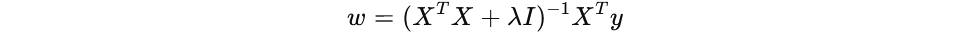

**数据预处理部分:**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

path = "winequality-white.csv"
# 数据标准化
def standardize(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# 数据集读取
def read_data(path):
    data = np.loadtxt(path, delimiter=",", skiprows=1)
    label = data[:, -1]  # 标签是最后一列
    data = data[:, :-1]  # 特征是其他列
    return np.array(data), np.array(label)

**岭回归的核心计算:**

通过加入正则化参数 λ 防止过拟合:

In [45]:

# 岭回归解析解
def ridge_regression(X_train, y_train, lambd):
    XTX = np.dot(X_train.T, X_train)
    lambda_identity = lambd * np.eye(X_train.shape[1])
    inverse_term = np.linalg.inv(XTX + lambda_identity)
    w = np.dot(inverse_term, np.dot(X_train.T, y_train))
    return w

In [46]:
# 计算MSE
def MSE(weight, X, y):
    predictions = np.dot(X, weight)
    error = y - predictions
    mse = np.mean(error**2)
    return mse

**岭回归的执行及记录权重变化:**

对给定的 λλ 计算岭回归的权重，并评估训练集和测试集上的均方误差:

In [47]:

# 运行岭回归并计算误差，记录权重
def run_ridge_regression(X_train, X_test, y_train, y_test, lambd):
    # 计算岭回归权重
    w_ridge = ridge_regression(X_train, y_train, lambd)

    # 计算训练集和测试集的MSE
    train_mse = MSE(w_ridge, X_train, y_train)
    test_mse = MSE(w_ridge, X_test, y_test)

    # 输出权重信息
    print(f"正则化参数 λ = {lambd}")
    print(f"岭回归权重: {w_ridge}")
    print(f"训练集平均误差 (MSE)：{train_mse:.4f}")
    print(f"测试集平均误差 (MSE)：{test_mse:.4f}")
    return train_mse, test_mse, w_ridge

**岭回归交叉验证选择最佳正则化参数 λ:**

通过交叉验证选择最佳正则化参数 λ，并分别记录每个 λ 对应的平均训练误差、测试误差和权重。

使用 KFold 进行折叠**交叉验证**，评估每个 λ 值在不同数据划分上的表现，选取均方误差最低的 λ。

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


正则化参数 λ = 0.0001
岭回归权重: [ 5.87572967e+00  3.87356293e-02 -1.92990195e-01 -7.41818040e-03
  3.61294004e-01 -5.78386242e-04  8.70583750e-02 -1.02900435e-02
 -3.71624157e-01  9.06967166e-02  7.40683901e-02  2.81794160e-01]
训练集平均误差 (MSE)：0.5628
测试集平均误差 (MSE)：0.5690
正则化参数 λ = 0.0001
岭回归权重: [ 5.87499037e+00  5.80772256e-02 -1.89740334e-01  3.13057874e-03
  4.31751147e-01 -1.73428908e-03  5.15055412e-02 -1.23341401e-02
 -4.66177291e-01  1.10442361e-01  7.91864939e-02  2.33184260e-01]
训练集平均误差 (MSE)：0.5734
测试集平均误差 (MSE)：0.5233
正则化参数 λ = 0.0001
岭回归权重: [ 5.87173668  0.05001709 -0.18334501  0.00772735  0.39670777 -0.00737547
  0.06396361 -0.01509397 -0.42837859  0.10040264  0.06770419  0.24809529]
训练集平均误差 (MSE)：0.5551
测试集平均误差 (MSE)：0.5958
正则化参数 λ = 0.0001
岭回归权重: [ 5.88266162e+00  9.99810573e-02 -1.88709448e-01 -1.24834331e-03
  4.90050700e-01 -6.57529955e-03  4.70799757e-02 -1.42482892e-03
 -5.92320980e-01  1.22887093e-01  7.68536279e-02  1.58446666e-01]
训练集平均误差 (MSE)：0.5658
测试集平均误差 (MSE)：0.5594
正

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

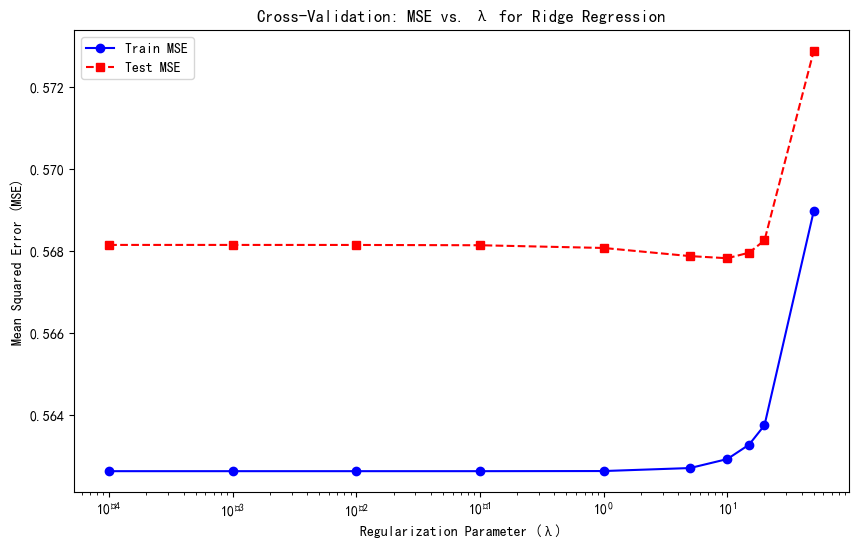

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

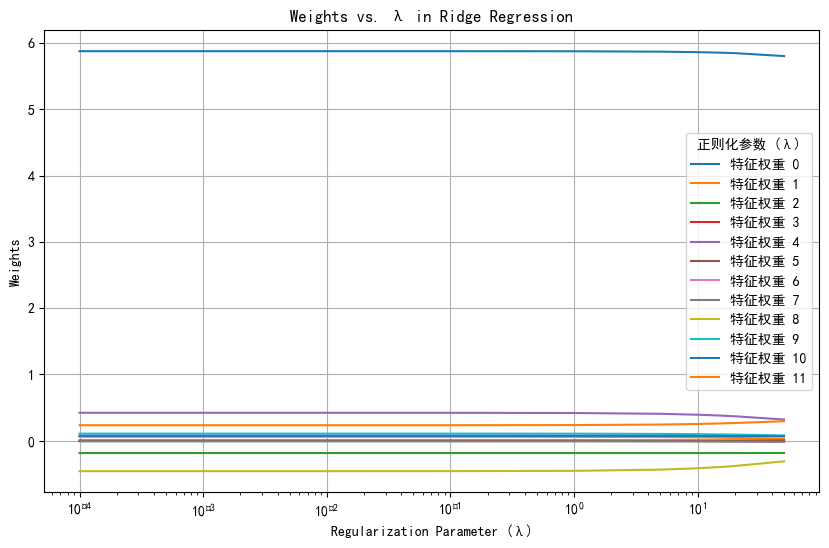


最佳的正则化参数 λ = 10, 对应的测试集 MSE = 0.5678


In [52]:
# 交叉验证选择最佳 λ，并绘制权重曲线
def cross_validate_ridge_regression(path, lambdas, folds=5):
    # 读取数据并标准化
    data, label = read_data(path)
    data = standardize(data)
    data = np.hstack((np.ones((data.shape[0], 1)), data))  # 加入偏置项

    # 使用K折交叉验证
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    avg_train_errors = []
    avg_test_errors = []
    best_lambda = None
    lowest_test_mse = float('inf')

    all_weights = []

    for lambd in lambdas:
        train_errors = []
        test_errors = []
        weights_per_lambda = []

        for train_index, test_index in kf.split(data):
            X_train, X_test = data[train_index], data[test_index]
            y_train, y_test = label[train_index], label[test_index]

            # 计算当前 λ 下的MSE和权重
            train_mse, test_mse, weights = run_ridge_regression(X_train, X_test, y_train, y_test, lambd)
            train_errors.append(train_mse)
            test_errors.append(test_mse)
            weights_per_lambda.append(weights)

        avg_train_mse = np.mean(train_errors)
        avg_test_mse = np.mean(test_errors)
        avg_train_errors.append(avg_train_mse)
        avg_test_errors.append(avg_test_mse)

        # 存储该λ下所有折的权重平均值
        avg_weights = np.mean(weights_per_lambda, axis=0)
        all_weights.append(avg_weights)

        if avg_test_mse < lowest_test_mse:
            lowest_test_mse = avg_test_mse
            best_lambda = lambd

        print(f"λ = {lambd}, 平均训练误差: {avg_train_mse:.4f}, 平均测试误差: {avg_test_mse:.4f}")
 # 绘制误差曲线
    plt.figure(figsize=(10, 6))
    plt.plot(lambdas, avg_train_errors, label="Train MSE", color="blue", marker="o")
    plt.plot(lambdas, avg_test_errors, label="Test MSE", color="red", marker="s", linestyle="--")
    plt.xscale('log')
    plt.xlabel("Regularization Parameter (λ)")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Cross-Validation: MSE vs. λ for Ridge Regression")
    plt.legend()
    plt.show()

    # 绘制权重更新曲线，并根据不同正则化参数注释
    plot_weight_update(lambdas, all_weights)

    print(f"\n最佳的正则化参数 λ = {best_lambda}, 对应的测试集 MSE = {lowest_test_mse:.4f}")

    return best_lambda

def plot_weight_update(lambdas, all_weights):
    plt.figure(figsize=(10, 6))
    all_weights = np.array(all_weights)
    
    # 绘制每一个特征的权重随不同λ的变化曲线
    for i in range(all_weights.shape[1]):
        plt.plot(lambdas, all_weights[:, i], label=f"特征权重 {i}")

    plt.xscale('log')
    plt.xlabel("Regularization Parameter (λ)")
    plt.ylabel("Weights")
    plt.title("Weights vs. λ in Ridge Regression")

    # 设置图例为不同的正则化参数 (λ)
    plt.legend(loc='best', title="正则化参数 (λ)")
    plt.grid(True)
    plt.show()

# 运行交叉验证，并选择最佳 λ
lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50]  # 这里是设置的不同正则化参数
best_lambda = cross_validate_ridge_regression(path, lambdas)

##### **3.2 结果分析：**

**1.MSE-λ曲线分析：**

从第一张图中可以看到，随着正则化参数λ的增加，训练集上的均方误差（Train MSE）逐渐减小，但在较大的λ值（如λ > 10）时，出现了明显的上升趋势。原因在于过大的正则化会导致模型的权重被过度压缩，从而降低了模型的拟合能力，最终导致误差上升。

在测试集上的均方误差（Test MSE）表现相对平稳，随着λ的增大基本保持在一个较为稳定的水平，直到λ增大到一定阈值后（如λ > 10）才出现显著上升。这表明适度的正则化对测试集的泛化能力影响较小，但过大的λ值会使模型的拟合能力下降，导致测试集误差增加。

**2.权重-λ曲线分析：**

第二张图展示了不同特征的权重随正则化参数λ变化的情况。从图中可以看出，随着λ的增加，各特征的权重逐渐向零靠拢。这是因为正则化项会抑制权重的大小，尤其对于不重要的特征，权重被大幅压缩，甚至接近于零。

当λ较小时，权重的变化较小，各特征对目标变量的影响仍然较大；但随着λ的增大，权重逐渐被压缩，模型的复杂度降低，这也解释了为什么在λ较大时训练误差会有所上升。

**3.最佳λ值选择：**

λ=10 表明在此数据集下，较大的正则化有助于减少模型的方差，使得模型能够在训练集和测试集之间取得平衡。虽然较小的 λ 可能会在训练集上取得更低的误差，但它们在测试集上的表现并不理想。这意味着λ=10 是正则化强度较为合适的选择，既减少了过拟合，又在测试集上表现优异。

#### **思考与总结**

**1. 遇到的问题与解决方法**

批量梯度下降和随机梯度下降收敛问题： 在实现批量梯度下降和随机梯度下降的过程中，我发现收敛速度和最终的误差受学习率和训练轮次的影响非常大。初期设置较高的学习率使得模型无法收敛，误差在训练中波动较大，甚至出现训练失败的情况。另一方面，较低的学习率虽然能够使模型稳定收敛，但训练过程变得极为缓慢。

解决方法：为了保证模型的稳定性和效率，我进行了多次实验，调整学习率并观察模型的误差收敛曲线，最终通过选择合理的学习率（如 0.003 或 0.001）和适当的训练轮次，使得梯度下降算法在可接受的时间内获得较好的收敛效果。

岭回归正则化参数 λ 的选择： 正则化参数 λ 的选择在岭回归中起到了至关重要的作用。初期使用过小的 λ，导致模型的效果与普通线性回归无异，无法抑制过拟合；而过大的 λ 则会让模型的预测能力减弱，使得模型偏向于过于简单的假设，导致欠拟合。

解决方法：通过交叉验证（K-fold cross-validation）来自动选择最佳的正则化参数 λ。交叉验证通过在不同的数据划分上评估模型的表现，帮助我们找到最合适的 λ，使得模型既能保持较低的训练误差，又能在测试集上取得较好的泛化能力。

**2. 学到的知识**

批量梯度下降与随机梯度下降的对比：
    批量梯度下降（BGD）：每次更新时使用整个训练集来计算梯度，虽然每次更新的步伐比较稳健，但是由于每次迭代都需要遍历整个训练集，当训练集较大时，效率较低。
    随机梯度下降（SGD）：每次更新时仅使用一个样本来计算梯度，虽然每次更新的速度很快，但步伐不稳定，可能会出现较大的误差波动。不过，经过多个迭代，随机梯度下降往往也能取得较好的结果。

通过对这两种梯度下降的分析与实验，我学会了如何根据数据规模和训练时间的限制来选择合适的优化算法。对较小数据集，批量梯度下降适用；而对于大规模数据，随机梯度下降由于其计算效率高，更加适合。

岭回归的正则化效果： 岭回归通过引入 L2 正则化，能够有效防止模型过拟合。实验中，正则化参数 λ 对模型性能的影响是非常明显的。通过交叉验证和可视化，我发现随着 λ 增大，模型中的特征权重逐渐被压缩，尤其是对噪声特征权重的压缩，使得模型的泛化能力得到了提升。

交叉验证与模型选择： 通过交叉验证自动选择 λ，大大减小了实验中的人为误差，使模型选择更加客观。在整个实验中，我理解了交叉验证如何通过在不同数据划分上评估模型性能，帮助我们做出合理的参数选择，从而提升模型的泛化能力。

数据预处理的重要性： 在批量梯度下降、随机梯度下降和岭回归的实现中，数据的标准化是必不可少的一步。未经标准化的数据，特征之间的尺度差异会导致模型学习到的权重不合理，从而影响模型的训练效果。

**3. 能力的提升**

模型调参能力： 实验中，通过不断调试和观察模型误差曲线，我掌握了如何有效调整学习率、正则化参数 λ 等超参数，使模型在训练和测试集上达到最优性能。尤其是在随机梯度下降和批量梯度下降的实现过程中，通过对学习率的动态调整，提升了收敛速度和精度。

实验设计与分析能力： 在本次实验中，我系统性地设计了岭回归、批量梯度下降和随机梯度下降的对比实验。通过构建和分析误差曲线、权重更新曲线等图表，使我能够更直观地理解和解释模型的行为。这种实验设计与分析能力对我未来处理更复杂的机器学习模型有很大帮助。

代码优化与调试能力： 在实验中，我遇到了一些效率问题，例如梯度下降的内存问题、收敛速度过慢等。通过代码优化和引入合适的调试手段，我成功解决了这些问题，并且大幅提升了模型训练的效率。这提升了我在机器学习项目中的代码调试和优化能力。

**4. 总结与展望**

本次实验综合了多种线性回归技术，尤其是对不同优化算法（BGD、SGD）和正则化方法的深入研究，使我对线性模型的优化、正则化和超参数调优有了全新的理解。岭回归通过正则化有效抑制了模型的过拟合问题，而交叉验证帮助我们自动选择出最优的正则化参数 λ，使得模型具有更好的泛化能力。